In [2]:
pip install shap

     |████████████████████████████████| 564 kB 8.7 MB/s 


In [11]:
import numpy as np
import pandas as pd
import shap

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import seaborn as sns # for correlation heatmap

from xgboost import XGBRegressor

In [13]:
boston = pd.read_csv('/content/p2mod.csv')
X = boston.drop(columns='Y', axis=1)
Y = boston['Y']
print(X)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

           X1  X2  X3  X4  X5  X6  ...    X18    X19    X20   X21    X22   X23
0       20000   2   2   1  24   2  ...      0    689      0     0      0     0
1      120000   2   2   2  26  -1  ...      0   1000   1000  1000      0  2000
2       90000   2   2   2  34   0  ...   1518   1500   1000  1000   1000  5000
3       50000   2   2   1  37   0  ...   2000   2019   1200  1100   1069  1000
4       50000   1   2   1  57  -1  ...   2000  36681  10000  9000    689   679
...       ...  ..  ..  ..  ..  ..  ...    ...    ...    ...   ...    ...   ...
29995  220000   1   3   1  39   0  ...   8500  20000   5003  3047   5000  1000
29996  150000   1   3   2  43  -1  ...   1837   3526   8998   129      0     0
29997   30000   1   2   2  37   4  ...      0      0  22000  4200   2000  3100
29998   80000   1   3   1  41   1  ...  85900   3409   1178  1926  52964  1804
29999   50000   1   2   1  46   0  ...   2078   1800   1430  1000   1000  1000

[30000 rows x 23 columns]


In [14]:
print(Y)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: Y, Length: 30000, dtype: int64


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=12)

In [16]:
xgb = XGBRegressor(n_estimators=100)
xgb.fit(X_train, y_train)

[17:22:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [17]:
xgb.feature_importances_

array([0.01513778, 0.00834296, 0.01314037, 0.00878722, 0.00758466,
       0.44551325, 0.13677213, 0.04899508, 0.06273374, 0.04264376,
       0.03121655, 0.01728265, 0.00936145, 0.00913361, 0.00795344,
       0.00879614, 0.01008987, 0.02197303, 0.01800228, 0.02911551,
       0.02117017, 0.01164002, 0.01461437], dtype=float32)

In [21]:
perm_importance = permutation_importance(xgb, X_test, y_test)

Text(0.5, 0, 'Permutation Importance')

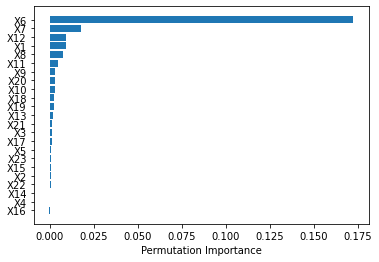

In [22]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(boston.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")